In [57]:
##Imports
from matplotlib import pyplot as plt
import numpy as np
import scipy

## Constants

hbar = 1.054571817e-34 #Js
e_mass = 9.1093837139e-31 #kg
kb = 1.380649e-23 # J/K


In [ ]:
# MAterial Dependent Properties:

# Dielectric

#Assume silicon
d_debye = 645
d_atomic_density = 4.995e28 #atoms/m^3
d_atoms_cell = 8
d_area = 1 # meter^2 (cross section)
d_height = 8e-6 #meters
d_path = 200e-9 #meters

# Liner Material
l_debye = 310
#l_atomic_density = 


## Via
# Potential Via Materials
# -Copper, Aluminum, Gold, Titanium, Tungsten
v_debye = 347
v_atomic_density = 8.491e28 #atoms/m^3
v_atoms_cell = 4
v_Ef = 7*1.6022e-19 #J
v_fill_percent = 20 #percent
#v_e_effective_mass = 

# Calculate relative areas
v_area = d_area*(v_fill_percent/100) #m^2
d_area = d_area*(1-v_fill_percent/100) #m^2



In [69]:
# Calculate the debye cutoff frequency from each material
d_w = d_debye*kb/hbar
l_w = l_debye*kb/hbar
v_w = v_debye*kb/hbar


# Calculate group velocity for each material
d_vg = d_w / ((6*np.pi**2*d_atomic_density)**(1/3))
print(d_vg)
#l_vg = 
v_vg = v_w / ((6*np.pi**2*v_atomic_density)**(1/3))
print(v_vg)

5882.627385546054
2651.7545198987577


In [ ]:
# Initialize sety of temperatures to calulate thermal conductivity over
T = np.linspace(.01, 300, 500)

#Define the distribution function
BE = lambda T, w: 1/(np.exp(hbar*w/(kb*T))-1)

MU = lambda T, Ef: Ef*(1-(np.pi**2/12)*(kb*T/Ef)**2)

FD = lambda T, E: 1/(np.exp((E-MU(T, v_Ef))/(kb*T))+1)



# Define the derivative of both distribution functions
df_dt_BE = lambda T, w: BE(T, w)**2*np.exp(hbar*w/(kb*T))*(hbar*w/(kb*T**2))
df_dt_FD = lambda T, E: FD(T, E)**2*np.exp(E-MU(T, v_Ef)/(kb*T))*(E-MU(T, v_Ef)/(kb*T**2))

# Calculate the Mode density for each material
v_M = 

C:\Users\Riley\AppData\Local\Temp\ipykernel_16472\2811355935.py:5: RuntimeWarning: overflow encountered in exp
  BE = lambda T, w: 1/(np.exp(hbar*w/(kb*T))-1)
C:\Users\Riley\AppData\Local\Temp\ipykernel_16472\2811355935.py:14: RuntimeWarning: overflow encountered in exp
  df_dt_BE = lambda T, w: BE(T, w)**2*np.exp(hbar*w/(kb*T))*(hbar*w/(kb*T**2))
C:\Users\Riley\AppData\Local\Temp\ipykernel_16472\2811355935.py:14: RuntimeWarning: invalid value encountered in multiply
  df_dt_BE = lambda T, w: BE(T, w)**2*np.exp(hbar*w/(kb*T))*(hbar*w/(kb*T**2))


Text(0.5, 1.0, 'df_dt')

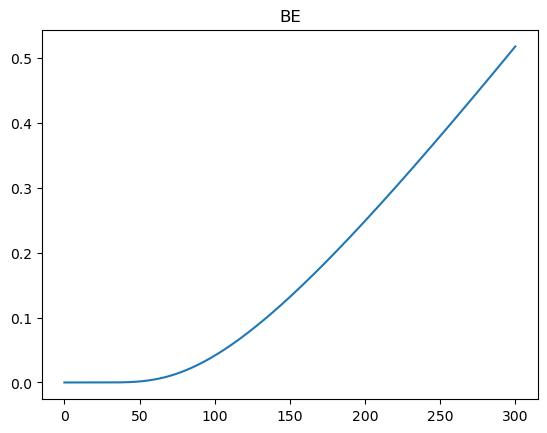

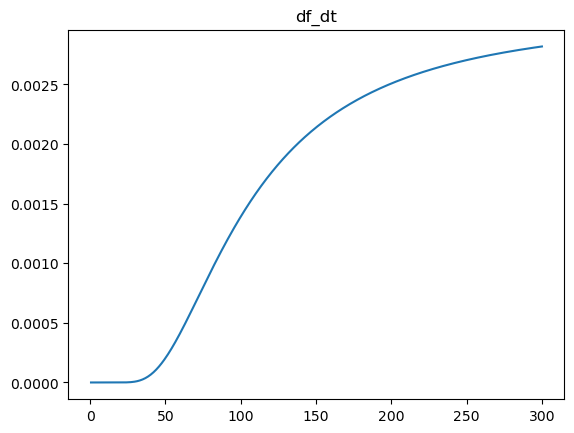

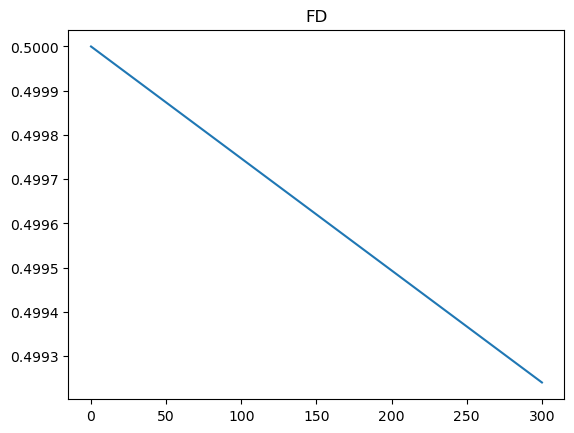

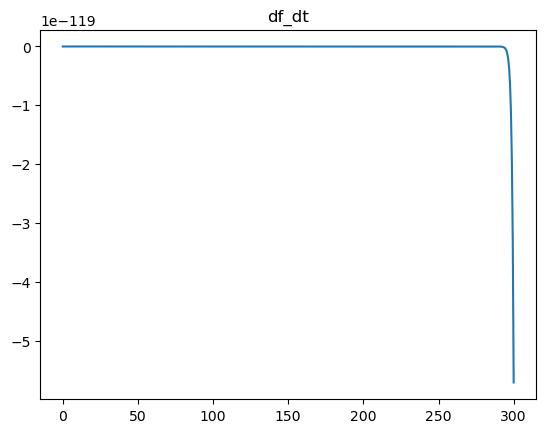

In [61]:
### Check to Make Sure the Distribution Functions are Working Correctly

w_sweep = np.linspace(0, 2*d_w, 200)
E_sweep = np.linspace(0, 2*v_Ef, 500)

plt.figure()
plt.plot(T, BE(T, d_w/2))

#plt.legend(['BE', 'df_dt'])
plt.title('BE')

plt.figure()
plt.plot(T, df_dt_BE(T, d_w/2))
plt.title('df_dt')

plt.figure()
plt.plot(T, FD(T, v_Ef))
plt.title('FD')

plt.figure()
plt.plot(T, df_dt_FD(T, v_Ef))
plt.title('df_dt')